In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_max = pd.read_csv('SpaceX_f9_clean.csv')
df_mini = pd.read_csv('SpaceX_categorical_onehot.csv')

In [3]:
df_max.shape

(146, 18)

In [4]:
df_mini.shape

(146, 87)

In [5]:
Y = df_max['Class'].to_numpy()

In [6]:
df_max.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
1,2,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
2,3,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
3,4,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
4,5,2014-01-06,Falcon 9,3325.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0


In [7]:
df_mini.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073
0,1.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,677.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,3170.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3325.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
Y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [9]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [10]:
Scaler = StandardScaler()

In [11]:
x_train, x_test, Y_train, Y_test = train_test_split(df_mini, Y, test_size  = 0.2, random_state = 30 )

In [12]:
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((116, 87), (30, 87), (116,), (30,))

In [13]:
X_train = Scaler.fit(x_train).transform(x_train)

In [14]:
X_train[0]

array([ 0.48673432,  1.39864602,  1.36284906,  0.32366944,  0.7393691 ,
        0.32366944,  0.60127787,  0.79303881, -0.09325048,  0.        ,
       -0.51075392, -0.09325048, -0.47016235, -0.21223818, -0.21223818,
       -0.30714756, -0.25341701, -0.09325048,  1.35250445, -1.19023807,
        1.73205081, -0.44257913, -0.32366944, -0.18898224,  1.30294836,
       -0.13245324, -0.35526552, -0.55079106,  0.        ,  0.        ,
        0.        ,  0.        , -0.09325048,  0.        , -0.09325048,
       -0.09325048, -0.09325048,  0.        , -0.09325048, -0.09325048,
       -0.09325048, -0.09325048, -0.09325048, -0.09325048, -0.09325048,
       -0.09325048, -0.13245324, -0.09325048,  0.        , -0.09325048,
       -0.09325048, -0.09325048, -0.09325048, -0.09325048, -0.13245324,
       -0.09325048, -0.09325048, -0.13245324, -0.13245324,  0.        ,
       -0.09325048, -0.13245324, -0.09325048, -0.13245324, -0.09325048,
        0.        , -0.13245324, -0.16293763, -0.16293763, -0.18

In [15]:
X_test = Scaler.transform(x_test)

## Classification

In [16]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

### Logistic Regression

In [17]:
lr_parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}

In [18]:
LR = GridSearchCV(estimator = LogisticRegression(), 
                 param_grid = lr_parameters, cv = 10)

In [19]:
LR.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [20]:
LR.best_params_ ,LR.best_score_

({'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}, 0.8803030303030303)

In [21]:
LR

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [22]:
lr_Yhat =  LR.predict(X_test)

In [23]:
LR.score(X_test,Y_test)

0.8666666666666667

In [24]:
print(classification_report(Y_test, lr_Yhat))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.87      0.95      0.91        21

    accuracy                           0.87        30
   macro avg       0.86      0.81      0.83        30
weighted avg       0.87      0.87      0.86        30



In [25]:
confusion_matrix(Y_test, lr_Yhat)

array([[ 6,  3],
       [ 1, 20]], dtype=int64)

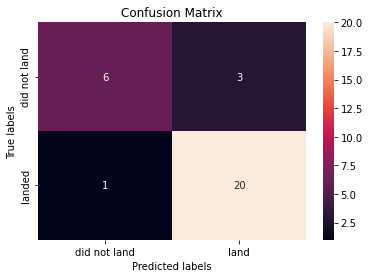

In [26]:
plot_confusion_matrix(Y_test,lr_Yhat)

### Support Vector Machine

In [27]:
svm_parameters = {'kernel':('linear','rbf','poly','sigmoid'),
                 'C': np.logspace(-3,3,5),
                 'gamma' : np.logspace(-3,3,5)}

In [28]:
svm = GridSearchCV(estimator = SVC(), param_grid = svm_parameters, cv = 10)

In [29]:
svm.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [30]:
svm.best_params_, svm.best_score_

({'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'},
 0.9068181818181819)

In [31]:
svm.score(X_test, Y_test)

0.8666666666666667

In [32]:
svm_Yhat = svm.predict(X_test)

In [33]:
print(classification_report(Y_test, svm_Yhat))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.87      0.95      0.91        21

    accuracy                           0.87        30
   macro avg       0.86      0.81      0.83        30
weighted avg       0.87      0.87      0.86        30



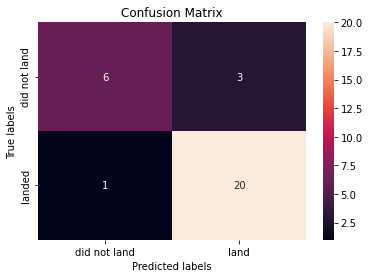

In [34]:
plot_confusion_matrix(Y_test,svm_Yhat)

### Decision Tree

In [35]:
dt_parameters = {'criterion' : ['gini','entropy'],
                'splitter':['best','random'],
                'max_depth' : [2*n for n in range(1,10)],
                'max_features' : ['sqrt'],
                'min_samples_leaf' : [1,2,4],
                'min_samples_split':[2,5,10]}

In [36]:
tree = DecisionTreeClassifier()

In [37]:
dtc = GridSearchCV(estimator = tree, param_grid = dt_parameters, cv = 10 ) 

In [38]:
dtc.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [39]:
dtc.best_params_ , dtc.best_score_

({'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 4,
  'min_samples_split': 5,
  'splitter': 'random'},
 0.9136363636363637)

In [40]:
dtc.score(X_test,Y_test)

0.7

In [41]:
dtc_Yhat = dtc.predict(X_test)

In [42]:
print(classification_report(Y_test, dtc_Yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      1.00      0.82        21

    accuracy                           0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30



C:\Users\Anant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Unde

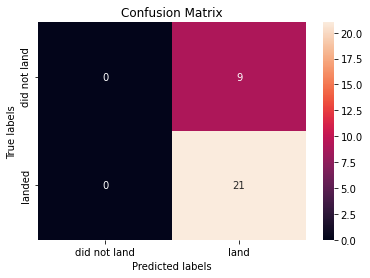

In [43]:
plot_confusion_matrix(Y_test, dtc_Yhat)

### KNN

In [44]:
knn_parameters = {'n_neighbors' : [3,4,5,6,7],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'p' : [1,2]}

In [45]:
k = KNeighborsClassifier()

In [46]:
knn = GridSearchCV(estimator = k, param_grid = knn_parameters, cv = 10)

In [47]:
knn.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2]})

In [48]:
data_bar = {'knn_accuracy' : knn.best_score_ , 'tree_accuracy' : dtc.best_score_, 
           'svm_accurcay' : svm.best_score_, 'logreg_accuracy' : LR.best_score_}
models = list(data_bar.keys())
accuracy_values = list(data_bar.values())


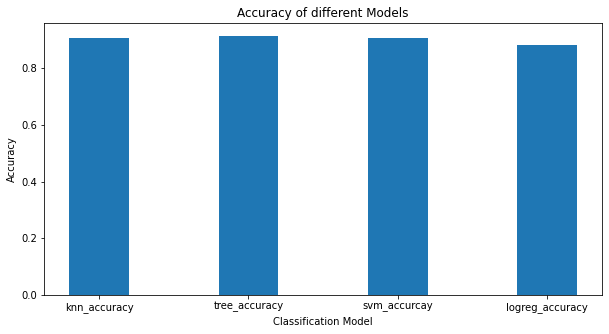

In [49]:
fig = plt.figure(figsize = (10, 5))
plt.bar(models, accuracy_values, width = 0.4)
plt.xlabel("Classification Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of different Models")
plt.show()

### Thank You